<a href="https://colab.research.google.com/github/dhivya90m/FoodHub/blob/main/Project_FoodHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 13.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.4 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.4

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# Mount on my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# To read the data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project 1/foodhub_order.csv')

In [6]:
# To view the first 5 rows
print(data.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
data.shape

(1898, 9)

#### Observations:


There are **1898** rows and **9** columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The dataset contains a mix of data types:**4 integer** columns (order_id, customer_id, food_preparation_time, delivery_time), **1 float** column (cost_of_the_order), and **4 object (string)** columns (restaurant_name, cuisine_type, day_of_the_week, rating)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
# checking missing values across each columns
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


The dataset contains no missing values across any columns. It includes both numerical and categorical data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# The statistical summary for both the numerical and categorical variables.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [20]:
# To Find minimum, average and maximum time it takes for food to be prepared once an order is placed
min_time = data['food_preparation_time'].min()
average_time = round(data['food_preparation_time'].mean(), 2)
max_time = data['food_preparation_time'].max()

print(f"Minimum time: {min_time}")
print(f"Average time: {average_time}")
print(f"Maximum time: {max_time}")

Minimum time: 20
Average time: 27.37
Maximum time: 35


#### Observations:


The time it takes for food to be prepared after an order is placed varies as follows:

- **Minimum time**: 20 minutes
- **Average time**: 27.37 minutes
- **Maximum time**: 35 minutes

This suggests that the food preparation time generally falls within a 20 to 35 minute range, with an average of around 27 minutes. This information could help the company assess operational efficiency and potential areas for improvement in food preparation times.







### **Question 5:** How many orders are not rated? [1 mark]

In [17]:
data[data['rating']=="Not given"].value_counts('rating')

,count
rating,
Not given,736


#### Observations:


Out of the total 1,836 orders, **736 orders do not have a rating**. This indicates that a significant portion of customers either did not provide feedback or possibly skipped the rating process, which could impact the company’s ability to assess customer satisfaction and improve service quality.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**1. Histograms and Boxplots for Numeric Columns**:

For columns like cost_of_the_order, food_preparation_time, and delivery_time

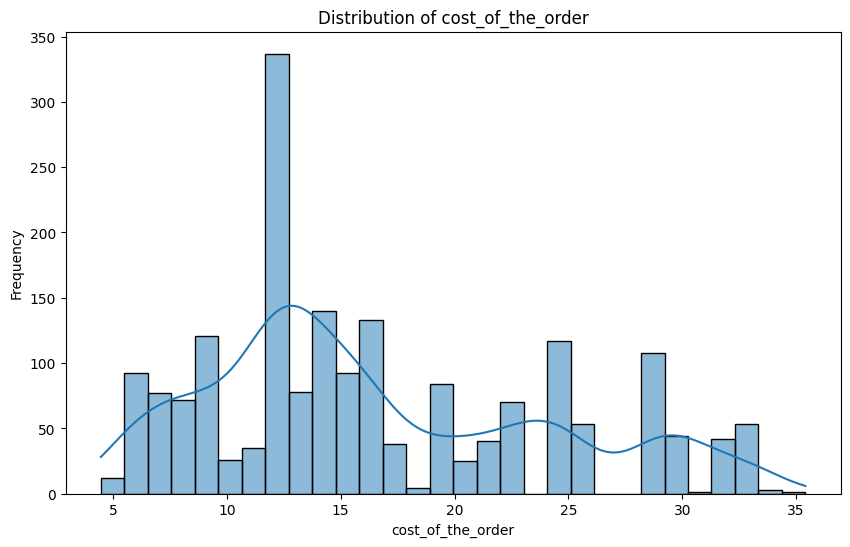

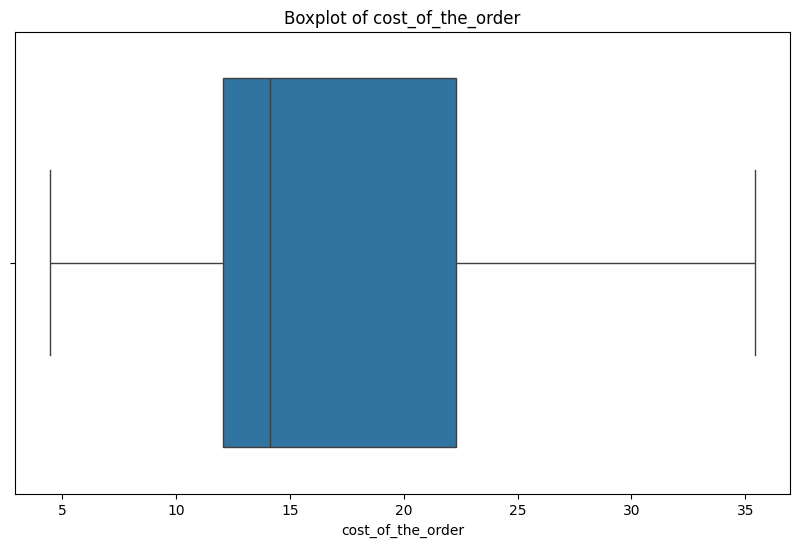

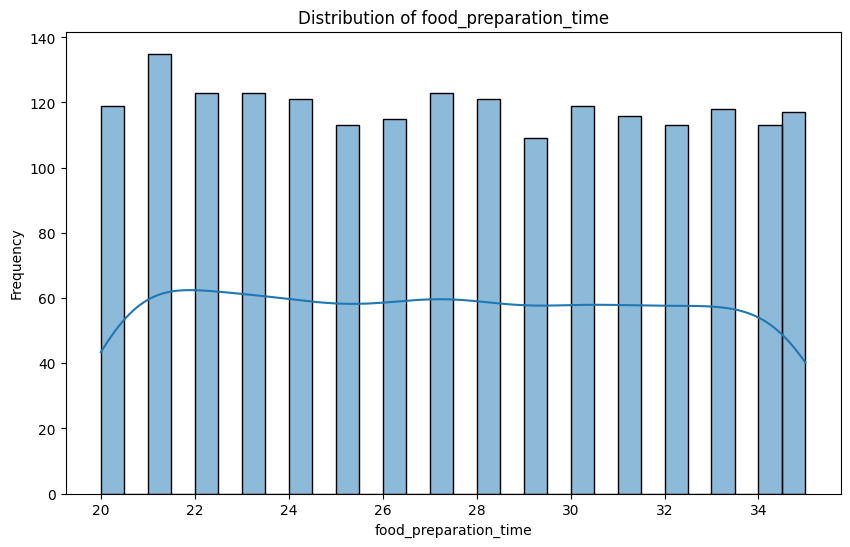

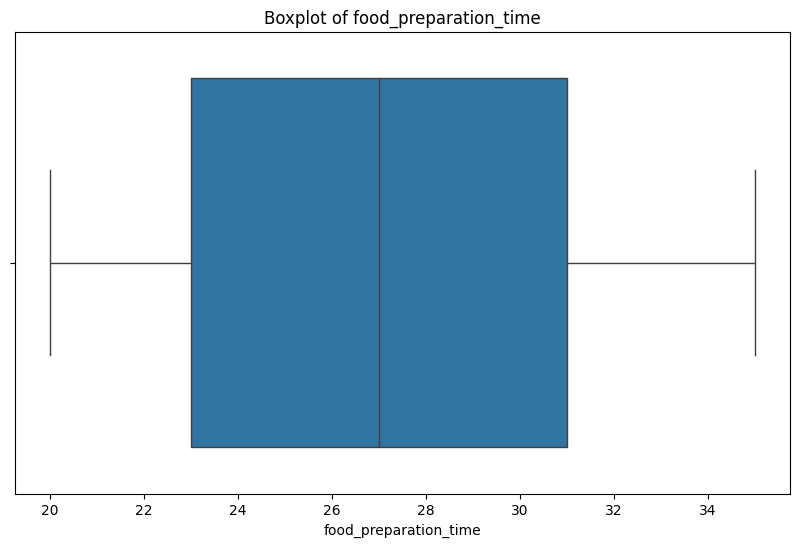

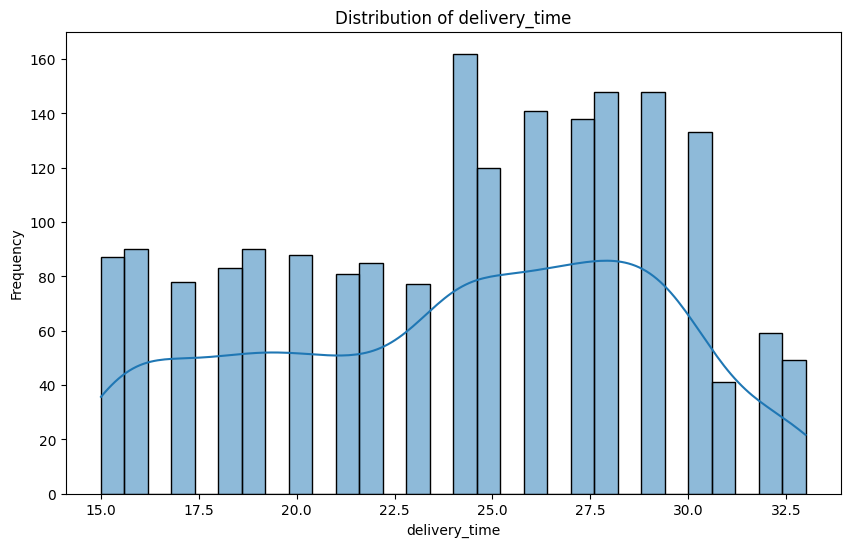

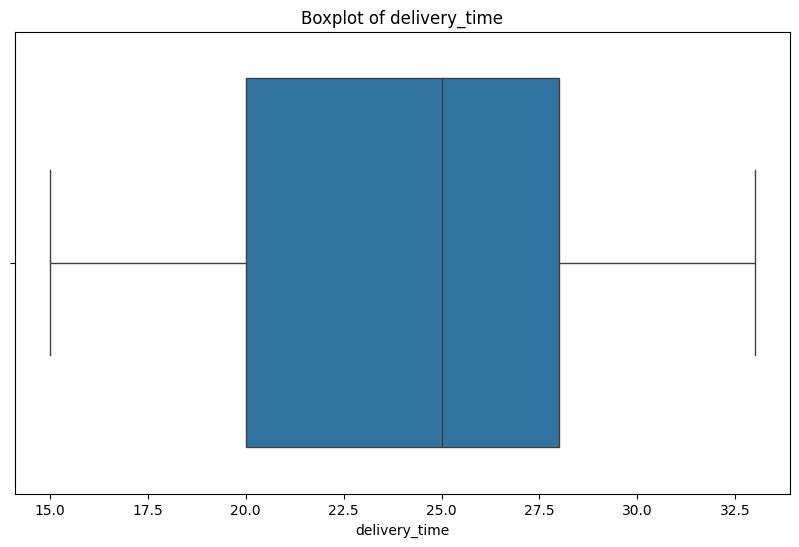

In [24]:
numeric_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to detect outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


#### Observations:

**2. Countplots for Categorical Columns**:

**a. Countplots for cuisine_type, day_of_the_week, and rating**

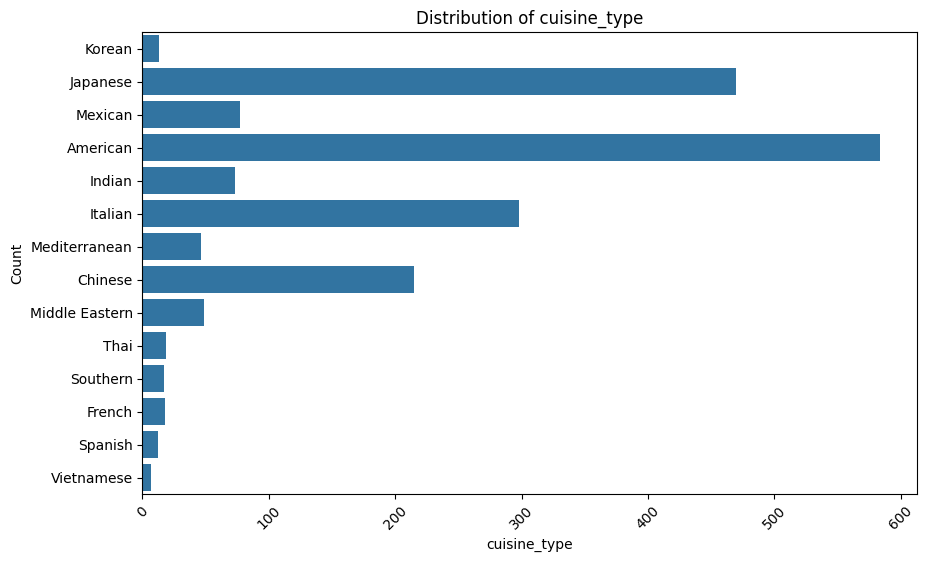

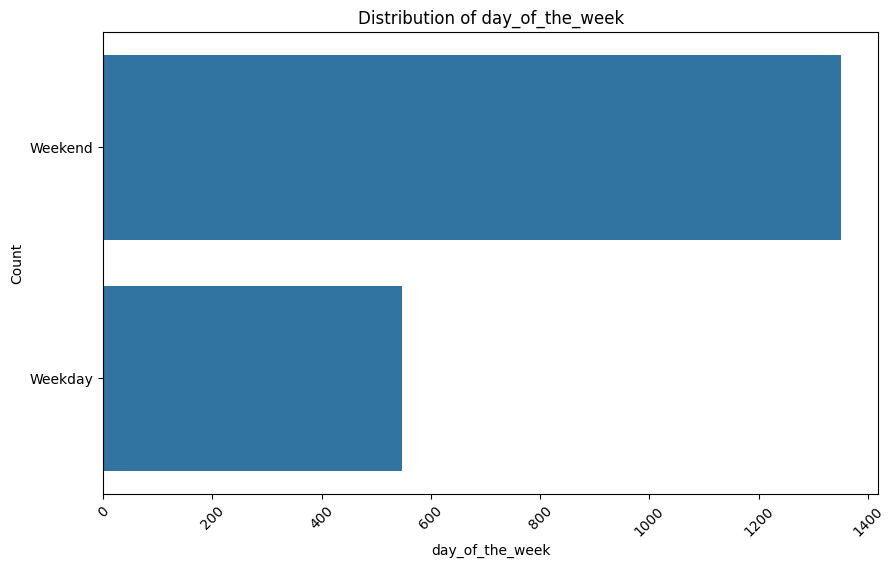

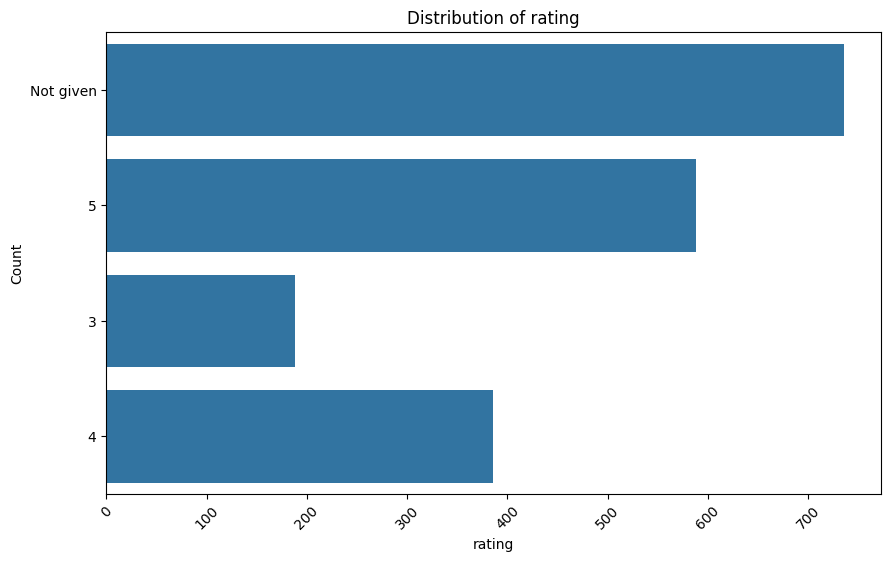

In [26]:
# Countplot for categorical columns
categorical_columns = ['cuisine_type', 'day_of_the_week', 'rating']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


#### Observations:

**b. Countplots for Restaurant**:

As there are a large number of categories (unique restaurant names), displaying them all in a countplot can result in a cluttered and unreadable chart. Hence showing them as


1.   Top 10 Restaurants
2.   Restaurant Distribution by Grouping with Cuisine



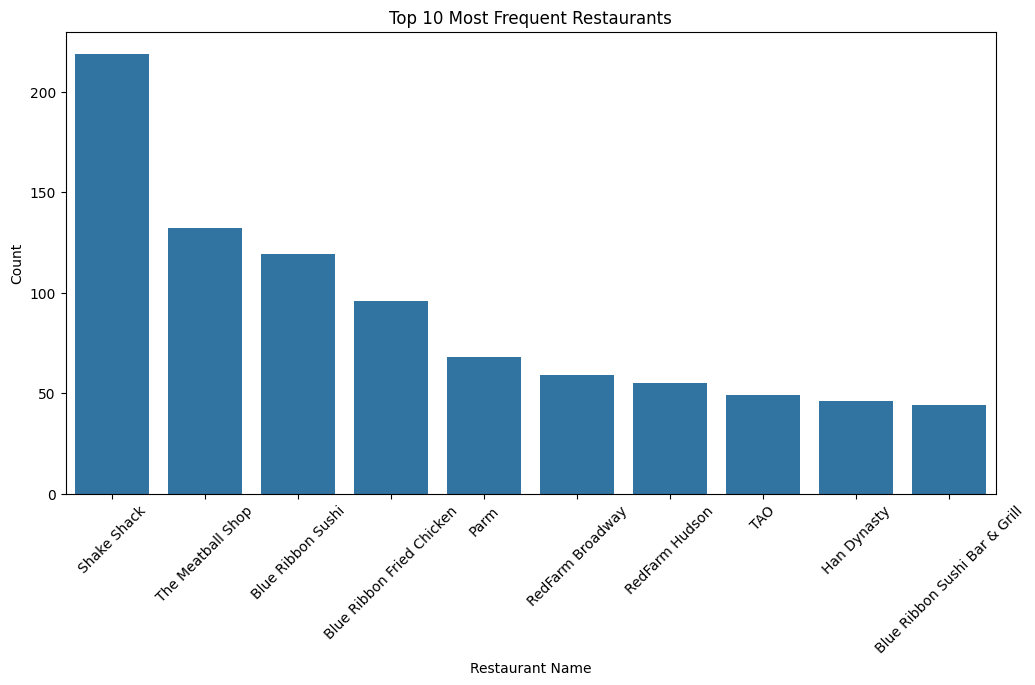

In [27]:
# Get the top 10 most frequent restaurants
top_restaurants = data['restaurant_name'].value_counts().nlargest(10).index
top_restaurant_data = data[data['restaurant_name'].isin(top_restaurants)]

# Countplot for top 10 restaurants
plt.figure(figsize=(12, 6))
sns.countplot(x='restaurant_name', data=top_restaurant_data, order=top_restaurants)
plt.title('Top 10 Most Frequent Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


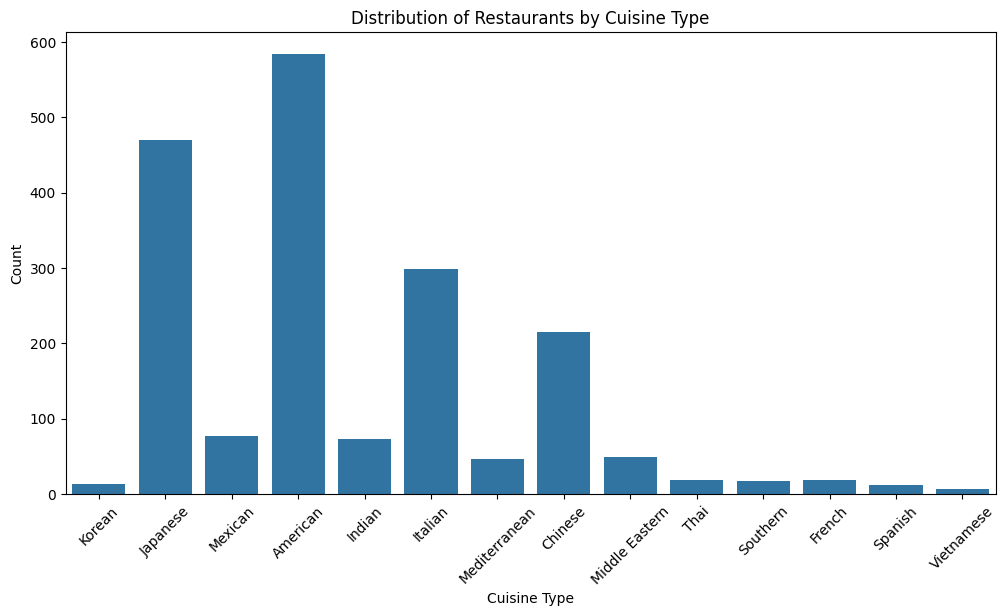

In [30]:
# Count of restaurants by cuisine type
plt.figure(figsize=(12, 6))
sns.countplot(x='cuisine_type', data=data)
plt.title('Distribution of Restaurants by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [42]:
top_5_restaurants = data.restaurant_name.value_counts().head(5)
print("Top 5 Restaurants and their Order Counts:")
print(top_5_restaurants)

Top 5 Restaurants and their Order Counts:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


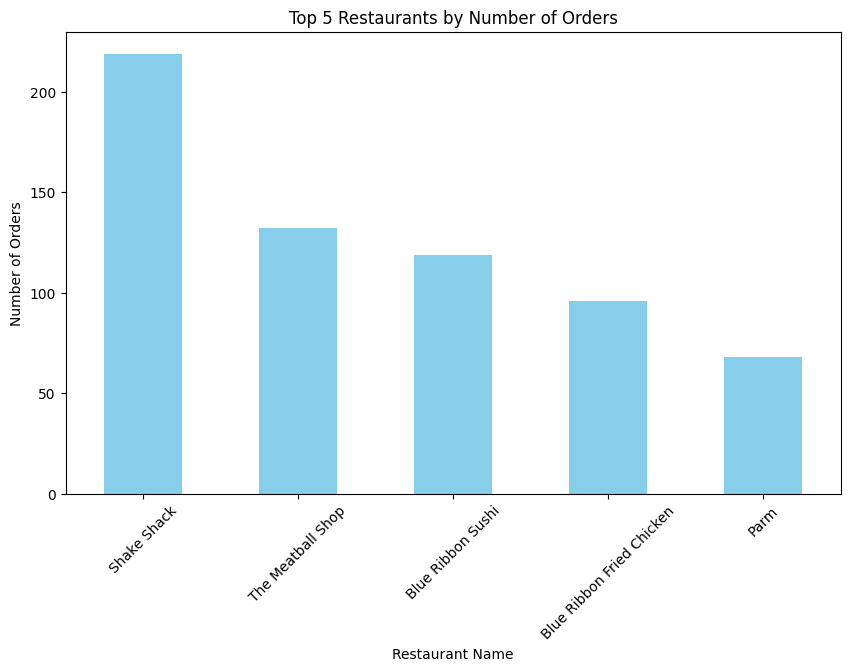

In [43]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
top_5_restaurants.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants by Number of Orders')

# Show the plot
plt.xticks(rotation=45)
plt.show()


#### Observations:


- **Shake Shack** is the most popular restaurant with **219 orders**, showcasing its high demand.  
- **The Meatball Shop** ranks second with **132 orders**, reflecting its strong customer base.  
- **Blue Ribbon Sushi** and **Blue Ribbon Fried Chicken** follow with **119** and **96 orders**, highlighting consistent demand for their offerings.  
- **Parm**, with **68 orders**, secures the fifth spot, indicating a smaller but dedicated clientele.  

These insights help identify key restaurants driving customer traffic and provide opportunities for targeted promotional campaigns.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [49]:
weekend_cuisine_counts = data[data['day_of_the_week'] == "Weekend"]['cuisine_type'].value_counts()
print("Weekend Cuisine count:")
print(weekend_cuisine_counts)
most_popular_cuisine = data[data['day_of_the_week'] == "Weekend"]['cuisine_type'].value_counts().idxmax()
print("\nThe most popular cuisine on weekends is:", most_popular_cuisine)

Weekend Cuisine count:
cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

The most popular cuisine on weekends is: American


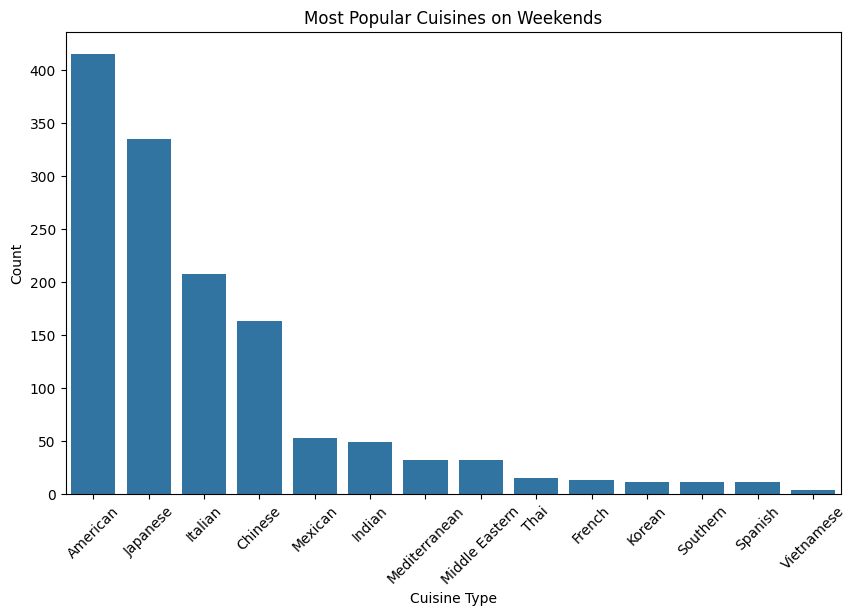

In [38]:
# Filter data for weekends and count the occurrences of each cuisine type
weekend_cuisine_counts = data[data['day_of_the_week'] == "Weekend"]['cuisine_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=weekend_cuisine_counts.index, y=weekend_cuisine_counts.values)

# Adding labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Most Popular Cuisines on Weekends')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [74]:
# Filter orders where the cost is greater than 20 dollars
orders_above_20 = data[data['cost_of_the_order'] > 20]

# Get the total number of orders in the dataset
total_orders = data.shape[0]

# Get the number of orders where the cost is greater than 20 dollars
orders_above_20_count = orders_above_20.shape[0]

# Calculate the percentage of orders costing more than 20 dollars
percentage_orders_above_20 = (orders_above_20_count / total_orders) * 100

# Print the result with formatted percentage
print(f"The percentage of orders that cost more than 20 dollars is {percentage_orders_above_20:.2f}%")


The percentage of orders that cost more than 20 dollars is 29.24%


#### Observations:


Based on the data from the FoodHub platform, **29.24%** of the total orders placed cost more than 20 dollars. This suggests that a considerable portion of the customers are opting for higher-value orders, which could play a crucial role in the company's revenue generation and targeted promotions for enhancing customer engagement.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [77]:
mean_delivery_time = data['delivery_time'].mean()
print("The mean order delivery time is:", mean_delivery_time, "minutes")

The mean order delivery time is: 24.161749209694417 minutes


In [76]:
mean_delivery_time = round(data['delivery_time'].mean())
print("The mean order delivery time is:", mean_delivery_time, "minutes")

The mean order delivery time is: 24 minutes


#### Observations:


The average time it takes for an order to be delivered, from the moment it is picked up by the delivery person to its drop-off at the customer's location, is **24 minutes**. This represents the typical delivery time for the company's orders.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [79]:
print("The top 3 most frequent customers are:")
print(data['customer_id'].value_counts().head(3))

The top 3 most frequent customers are:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


The top 3 most frequent customers, who are eligible for the 20% discount vouchers, are:

*   Customer ID: **52832** with **13** orders
*   Customer ID: **47440** with **10** orders
*   Customer ID: **83287** with **9** orders

These customers have demonstrated high engagement with the platform by placing the most orders, and are now eligible for promotional rewards.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [94]:
# Convert 'rating' to numeric, forcing errors to NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Group data by restaurant name
restaurant_ratings = data.groupby('restaurant_name')['rating']

# Calculate the rating count and average rating for each restaurant
restaurant_stats = restaurant_ratings.agg(['count', 'mean'])

# Filter restaurants based on the criteria
promotional_restaurants = restaurant_stats[
    (restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)
]

# Display the restaurants that meet the criteria
print("Restaurants eligible for the promotional offer:")
promotional_restaurants

Restaurants eligible for the promotional offer:


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:


The following restaurants meet the criteria for the promotional offer, with more than 50 ratings and an average rating greater than 4:
1.   **Blue Ribbon Fried Chicken:** 64 ratings, average rating 4.33
2.   **Blue Ribbon Sushi:** 73 ratings, average rating 4.22
1.   **Shake Shack:** 133 ratings, average rating 4.28
2.   **The Meatball Shop:** 84 ratings, average rating 4.51





These restaurants have demonstrated consistent customer satisfaction and engagement, making them eligible for the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [102]:
# Filter orders that cost more than 20 dollars
order_above_20 = data[data['cost_of_the_order'] > 20]['cost_of_the_order']

# Filter orders that cost more than 5 dollars but less than or equal to 20 dollars
order_5_to_20 = data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20)]['cost_of_the_order']

# Calculate the revenue generated from orders costing more than 20 dollars (25% charge)
company_order_20 = order_above_20.sum() * 0.25

# Calculate the revenue generated from orders costing more than 5 dollars but less than or equal to 20 dollars (15% charge)
company_order_5_to_20 = order_5_to_20.sum() * 0.15

# Calculate the total net revenue
net_revenue = company_order_20 + company_order_5_to_20

# Print the net revenue
print("The net revenue generated by the company across all orders is:", net_revenue, "dollars")

The net revenue generated by the company across all orders is: 6166.303 dollars


#### Observations:


The net revenue generated by the company across all orders amounts to 6166.30 dollars. This revenue is derived from the service charge percentages applied to orders based on their cost, reflecting the company's earnings from facilitating food delivery services.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [118]:
# sum of food preparation time and delivery time for each order
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

# the order_id along with the total time:
total_time = data[['order_id', 'total_time']]

# Filter the rows where total time is greater than 60 minutes
total_time_above_60 = total_time[total_time['total_time'] > 60]

# Count the number of orders that take more than 60 minutes
total_above_60 = total_time_above_60.shape[0]

# Get the total number of orders in the dataset
total_orders = data.shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_orders_above_60 = (total_above_60 / total_orders) * 100

# Print the percentage of orders that take more than 60 minutes to get delivered
print(f"The percentage of orders that take more than 60 minutes to get delivered is {percentage_orders_above_60:.2f}%")



The percentage of orders that take more than 60 minutes to get delivered is 10.54%


#### Observations:


Approximately 10.54% of orders take more than 60 minutes to be delivered, including both food preparation and delivery time, indicating room for improvement in efficiency to reduce delays and enhance customer satisfaction.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [124]:
data_day_weekend = data[data['day_of_the_week']=='Weekend']
data_day_weekday = data[data['day_of_the_week']== 'Weekday']
delivery_weekend = data_day_weekend['delivery_time'].mean()
delivery_weekday = data_day_weekday['delivery_time'].mean()
delivery_time = {'Weekend': delivery_weekend, 'Weekday': delivery_weekday}
delivery_time

{'Weekend': 22.4700222057735, 'Weekday': 28.340036563071298}

#### Observations:


The analysis of delivery times reveals a noticeable difference between weekdays and weekends:  

- **Weekend mean delivery time:** 22.47 minutes  
- **Weekday mean delivery time:** 28.34 minutes  

This indicates that orders are delivered faster on weekends compared to weekdays. This could be due to lighter traffic or a lower volume of orders during weekends, allowing for quicker deliveries.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---